In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Part 1: Analyse and Explore the Climate Data
In this section, you’ll use Python and SQLAlchemy to do a basic climate analysis and data exploration of your climate database. Specifically, you’ll use SQLAlchemy ORM queries, Pandas, and Matplotlib

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

Use the SQLAlchemy create_engine() function to connect to your SQLite database

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

Use the SQLAlchemy automap_base() function to reflect your tables into classes

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect= True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

Save references to the classes named station and measurement

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

Link Python to the database by creating a SQLAlchemy session

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis



In [9]:
# I imported from sqlalchemy import inspect to find column names for each table to more accurately query 
# https://stackoverflow.com/questions/38940682/how-can-i-get-column-name-and-type-from-an-existing-table-in-sqlalchemy
inspector = inspect(engine)
columns = inspector.get_columns("measurement") 
for c in columns:
    print (c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
columns = inspector.get_columns("station") 
for c in columns:
    print (c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Find the first measurement date
inspector = inspect(engine)
columns = inspector.get_columns("measurement") 
# session.query(Measurement.date).all()
session.query(Measurement.date).first()

('2010-01-01',)

In [12]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


Using the above date, get the previous 12 months of precipitation data by querying the previous 12 months of data.

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database (2017-08-23). 
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()
prcp_data

[('2016-08-23', 0.0),
 ('2016-08-23', 3.8),
 ('2016-08-23', 1.3),
 ('2016-08-23', None),
 ('2016-08-23', 0.5),
 ('2016-08-23', 45.5),
 ('2016-08-23', 17.8),
 ('2016-08-24', 2.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 57.9),
 ('2016-08-24', None),
 ('2016-08-24', 31.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 36.8),
 ('2016-08-25', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 5.3),
 ('2016-08-25', 1.5),
 ('2016-08-25', 2.8),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.8),
 ('2016-08-26', 0.5),
 ('2016-08-26', 1.0),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.3),
 ('2016-08-27', 0.0),
 ('2016-08-27', 4.6),
 ('2016-08-27', 0.5),
 ('2016-08-27', 0.0),
 ('2016-08-27', 3.0),
 ('2016-08-27', None),
 ('2016-08-28', 0.3),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 15.2),
 ('2016-08-28', 52.6),
 ('2016-08-29', 0.0),
 ('2016-08-29', 4.3),
 ('2016-08-29', 1.0),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 8.9

In [14]:
# Calculate the date one year from the last date in data set.
latest_date = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d')
start_date = latest_date - dt.timedelta(days=365)
print(start_date)


2016-08-23 00:00:00


In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column. 
# Drop NaN values. 
# Sort the dataframe by date
prcp_data_df = pd.DataFrame(prcp_data, columns=['date', 'prcp'])
prcp_data_df.dropna(how='any', inplace= True)
prcp_data_df.sort_values(by='date')
prcp_df = prcp_data_df.set_index('date')
prcp_df.head()

,prcp
date,
2016-08-23,0.0
2016-08-23,3.8
2016-08-23,1.3
2016-08-23,0.5
2016-08-23,45.5


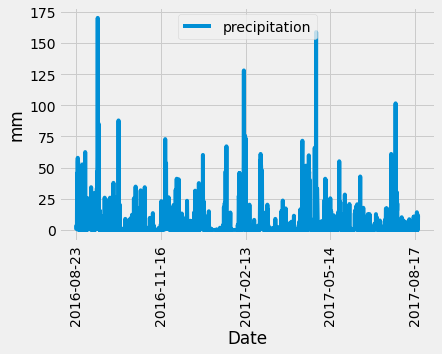

<Figure size 432x288 with 0 Axes>

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()

plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('mm')
L=plt.legend(loc='upper center')
L.get_texts()[0].set_text('precipitation')
# plt.tight_layout()

plt.show()
plt.savefig('Precipitation_Analysis.png')

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
total_stations= session.query(Station.station).count()
total_stations

9

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

# Answer the following question: which station id has the greatest number of observations?
Station ID USC00519281 has 2772 rows 

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Time of Observation Error (TOBs) in temperature maxima can be reliably measured from real data
station_temp_summary = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\                                 
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.station)
for station in station_temp_summary:
    print(station)

('USC00519281', 12.2, 29.4, 22.03582251082252)


In [43]:
# Using the most active station id, Query the last 12 months of temperature observation (TOBS) data for this station
# Filter by the station that has the greatest number of observations
station_ID_temps = session.query(Measurement.date, Measurement.tobs).\
        filter(func.strftime(Measurement.date) >= start_date, Measurement.station == 'USC00519281').\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()

# Create a datafrem containing the results of this query
station_ID_temps = pd.DataFrame(station_ID_temps, columns=['Measurement Date', 'Temperature'])
station_ID_temps.head()

,Measurement Date,Temperature
0,2016-08-24,25.0
1,2016-08-25,26.7
2,2016-08-26,26.7
3,2016-08-27,23.9
4,2016-08-28,22.8


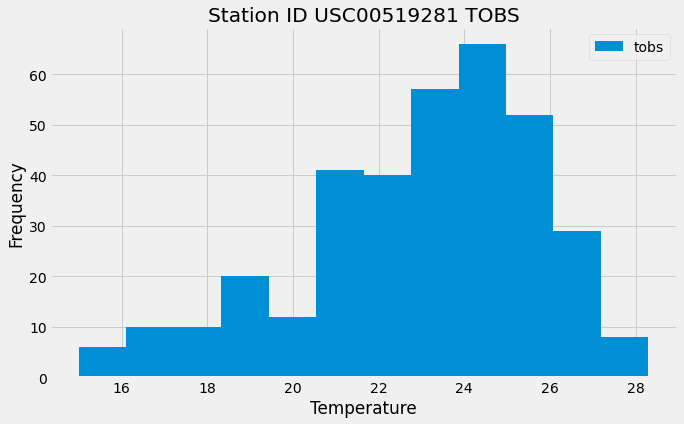

<Figure size 432x288 with 0 Axes>

In [36]:
# Plot the results as a histogram with bins=12
plt.figure(figsize = (10,6))
n, bins, patches = plt.hist(x=station_ID_temps["Temperature"], bins = 12, label='tobs')
# plt.grid(axis='y', alpha=0.5)
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Station ID USC00519281 TOBS')
plt.show()
plt.savefig('USC00519281_temps.png')

# Close session

In [37]:
# Close Session
session.close()